In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

vals = np.arange(0,1.1,0.1)

cs = np.zeros((11,4))

for i in range(11):
    cs[i] = np.array((vals[i],1,1,i))


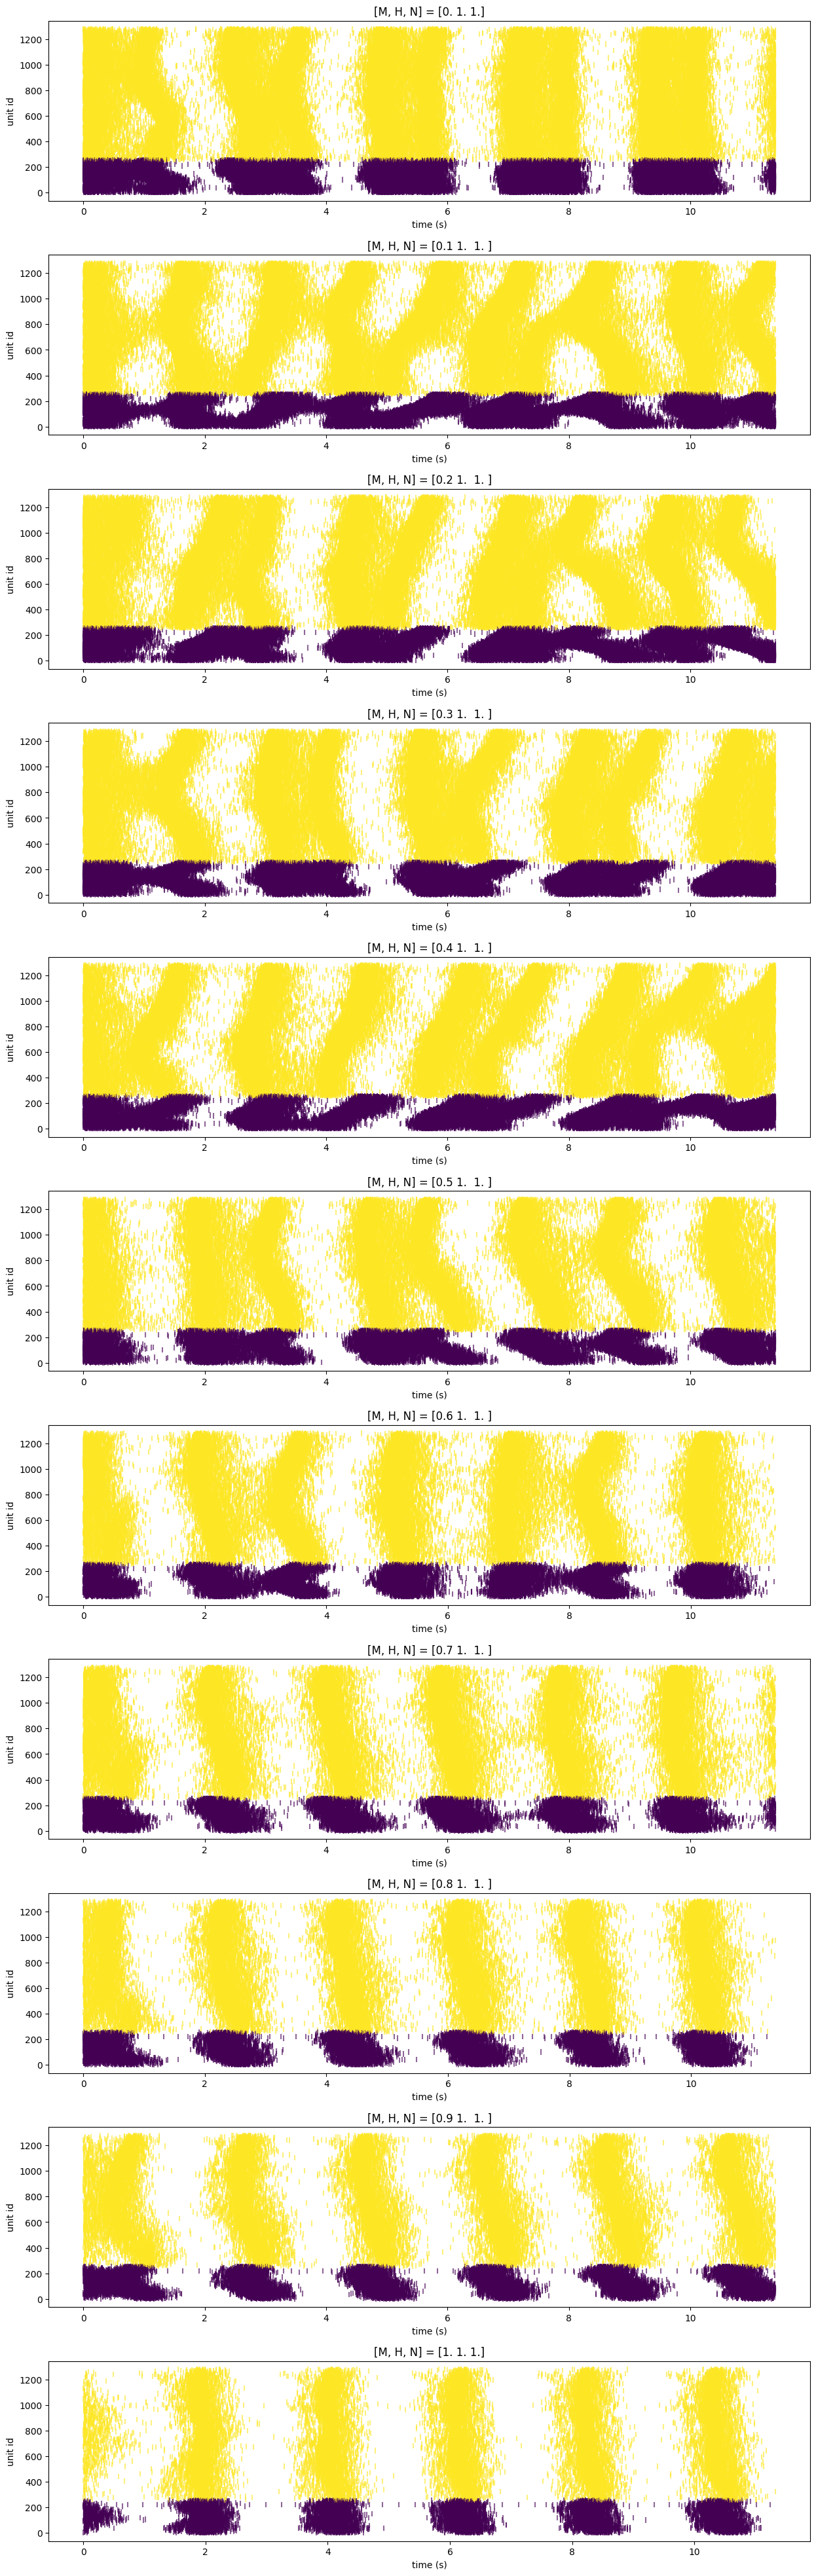

In [4]:
fig, axs = plt.subplots(11)
fig.set_figheight(50)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.3)

#plt.scatter(x=raw[:,0],y=raw[:,1],c=raw[:,2],marker="|",alpha = 0.6)

for i in range(0,11):
    #raw = np.loadtxt(r"C:\Users\Jacob\Documents\GitHub\M-Current-modulation-of-cortical-slow-oscillations\coarse_search\Raster_"+str(i)+".txt")
    raw = np.loadtxt(r"..\M_parameter_search\Raster_"+str(i)+".txt")
    raw2 = np.where(raw[:,2]==0,raw[:,1],raw[:,1]+256)
    axs[i].scatter(x=raw[:,0],y=raw2,c=raw[:,2],marker="|",alpha = 0.6)
    axs[i].set_title("[M, H, N] = " + str(cs[i,0:3]))
    axs[i].set_ylabel("unit id")
    axs[i].set_xlabel("time (s)")

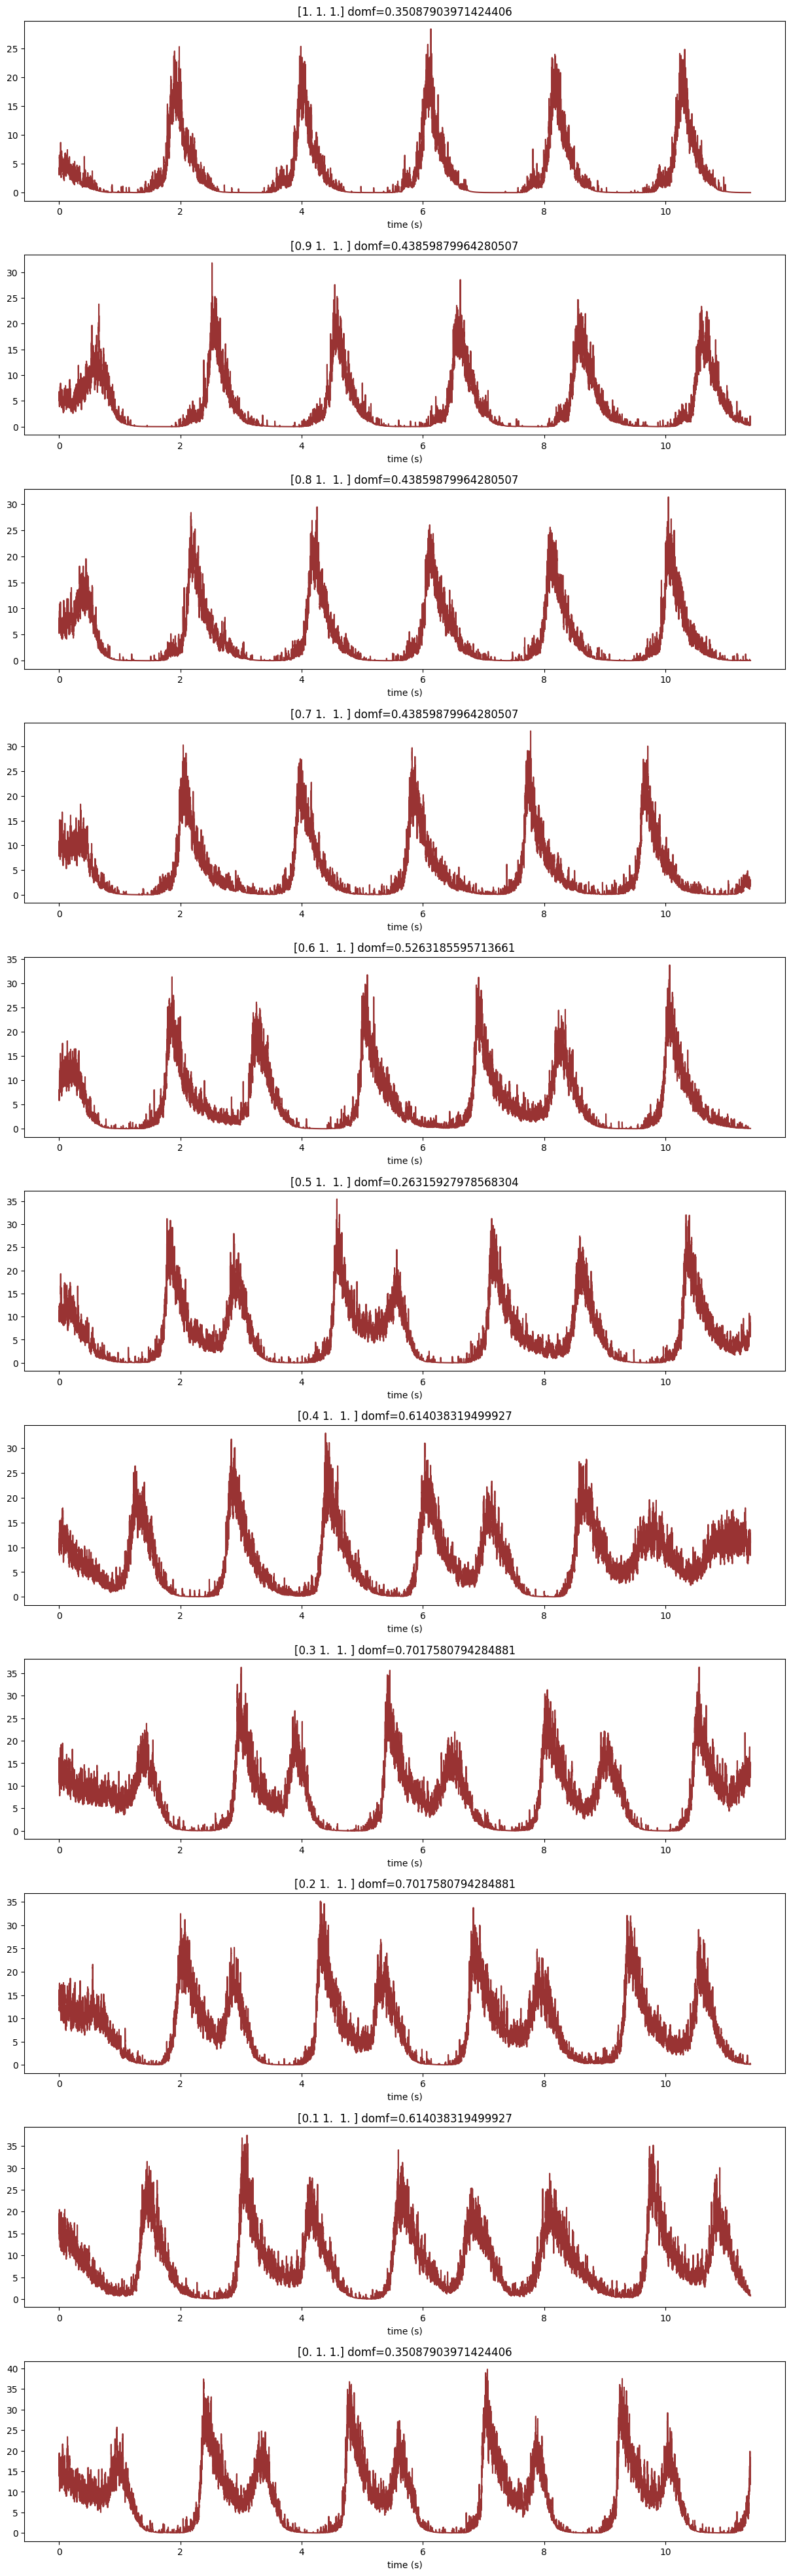

In [6]:
fig, axs = plt.subplots(11)
fig.set_figheight(50)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.3)

#plt.scatter(x=raw[:,0],y=raw[:,1],c=raw[:,2],marker="|",alpha = 0.6)

domfs_m = np.zeros(11)

for i in range(11):
    raw = np.loadtxt(r"..\M_parameter_search\LFP_"+str(i)+".txt")
    #raw = np.loadtxt(r"C:\Users\Jacob\Documents\GitHub\M-Current-modulation-of-cortical-slow-oscillations\coarse_search\LFP_"+str(i)+".txt")

    #take the fourier transform
    freqs = fft.rfftfreq(len(raw[:,1]),0.00006)
    sp = fft.rfft(raw[:,1])
    sp = abs(sp)
    #grab the dominant frequency (only concerned with a certain range, ie. ~0-4 Hz)
    f = freqs[np.argmax(sp.real[1:100])]
    domfs_m[i] = f

    axs[10-i].plot(raw[:,0],raw[:,1],color="maroon",alpha=0.8)
    axs[10-i].set_title(str(str(cs[i,0:3])+ " domf="+str(f)))
    axs[10-i].set_xlabel("time (s)")

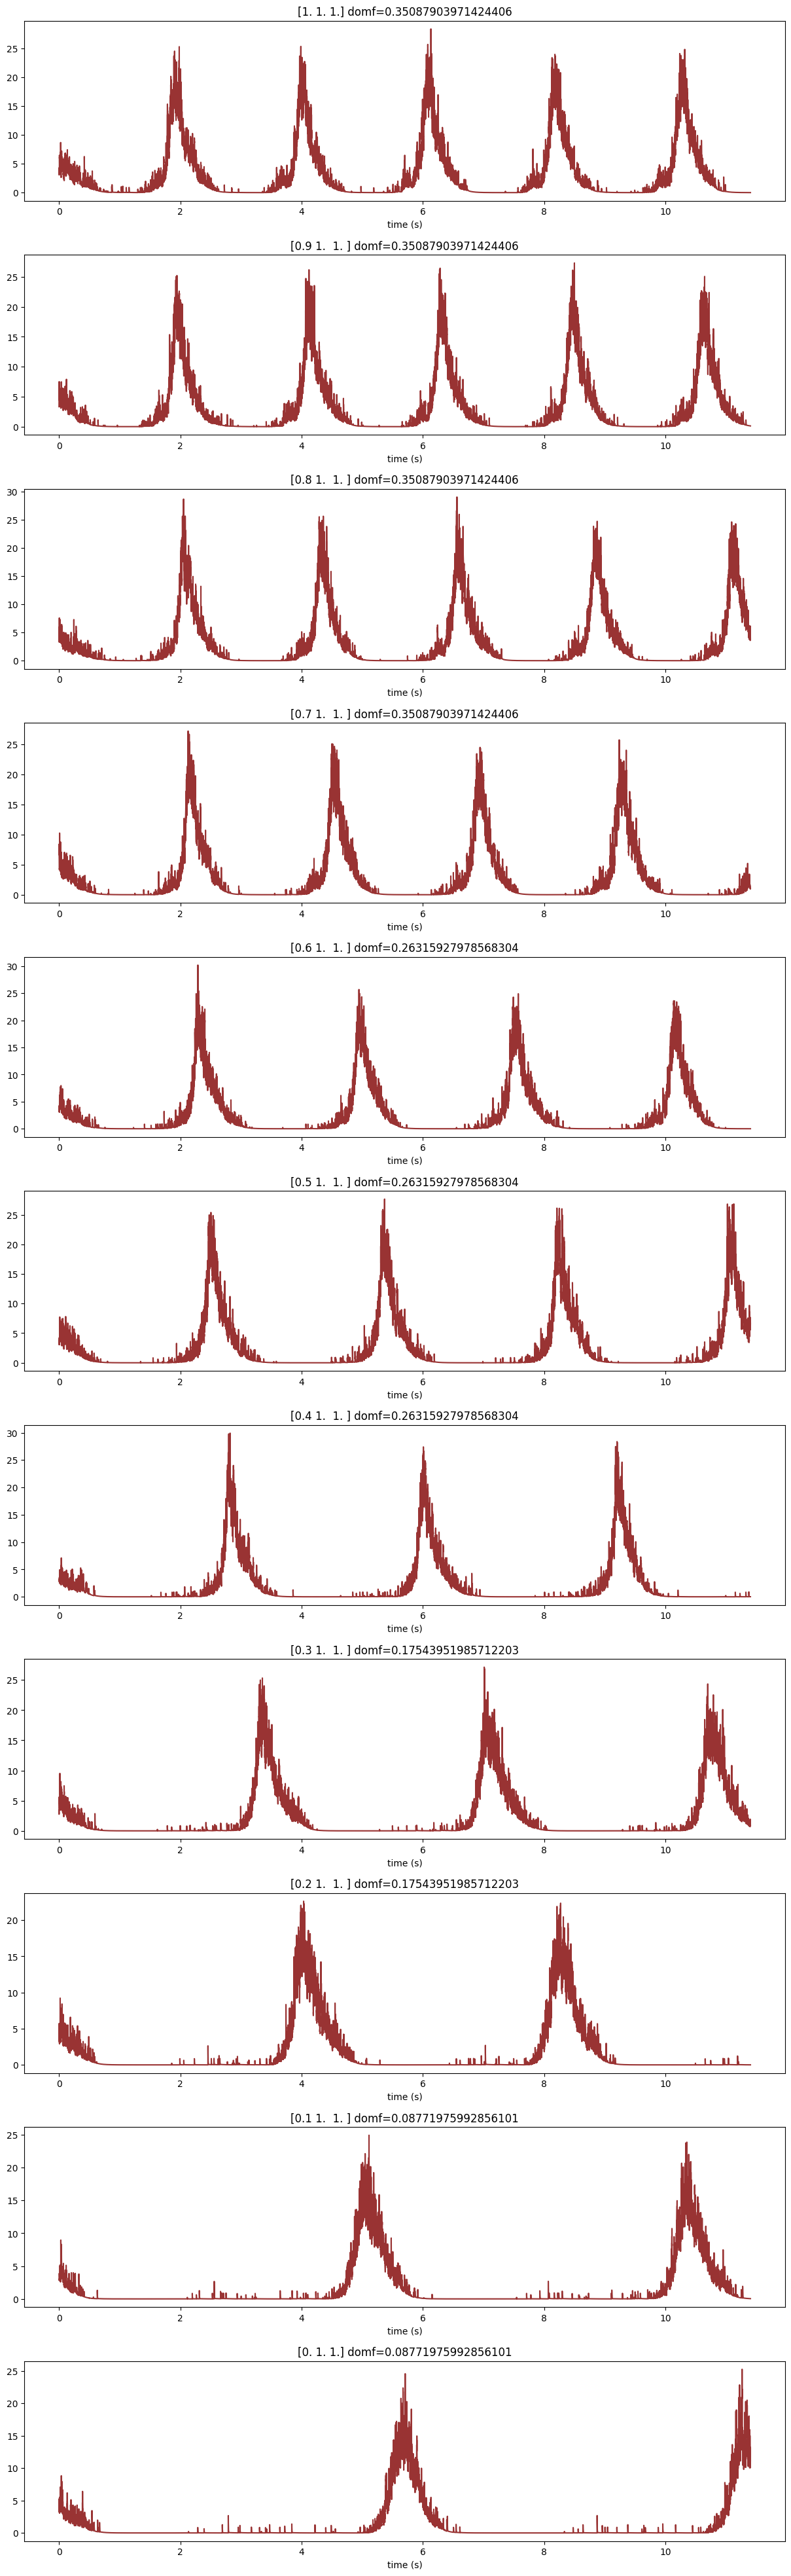

In [7]:
fig, axs = plt.subplots(11)
fig.set_figheight(50)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.3)

#plt.scatter(x=raw[:,0],y=raw[:,1],c=raw[:,2],marker="|",alpha = 0.6)

domfs_h = np.zeros(11)

for i in range(11):
    raw = np.loadtxt(r"..\H_parameter_search\LFP_"+str(i)+".txt")
    #raw = np.loadtxt(r"C:\Users\Jacob\Documents\GitHub\M-Current-modulation-of-cortical-slow-oscillations\coarse_search\LFP_"+str(i)+".txt")

    #take the fourier transform
    freqs = fft.rfftfreq(len(raw[:,1]),0.00006)
    sp = fft.rfft(raw[:,1])
    sp = abs(sp)
    #grab the dominant frequency (only concerned with a certain range, ie. ~0-4 Hz)
    f = freqs[np.argmax(sp.real[1:100])]
    domfs_h[i] = f

    axs[10-i].plot(raw[:,0],raw[:,1],color="maroon",alpha=0.8)
    axs[10-i].set_title(str(str(cs[i,0:3])+ " domf="+str(f)))
    axs[10-i].set_xlabel("time (s)")

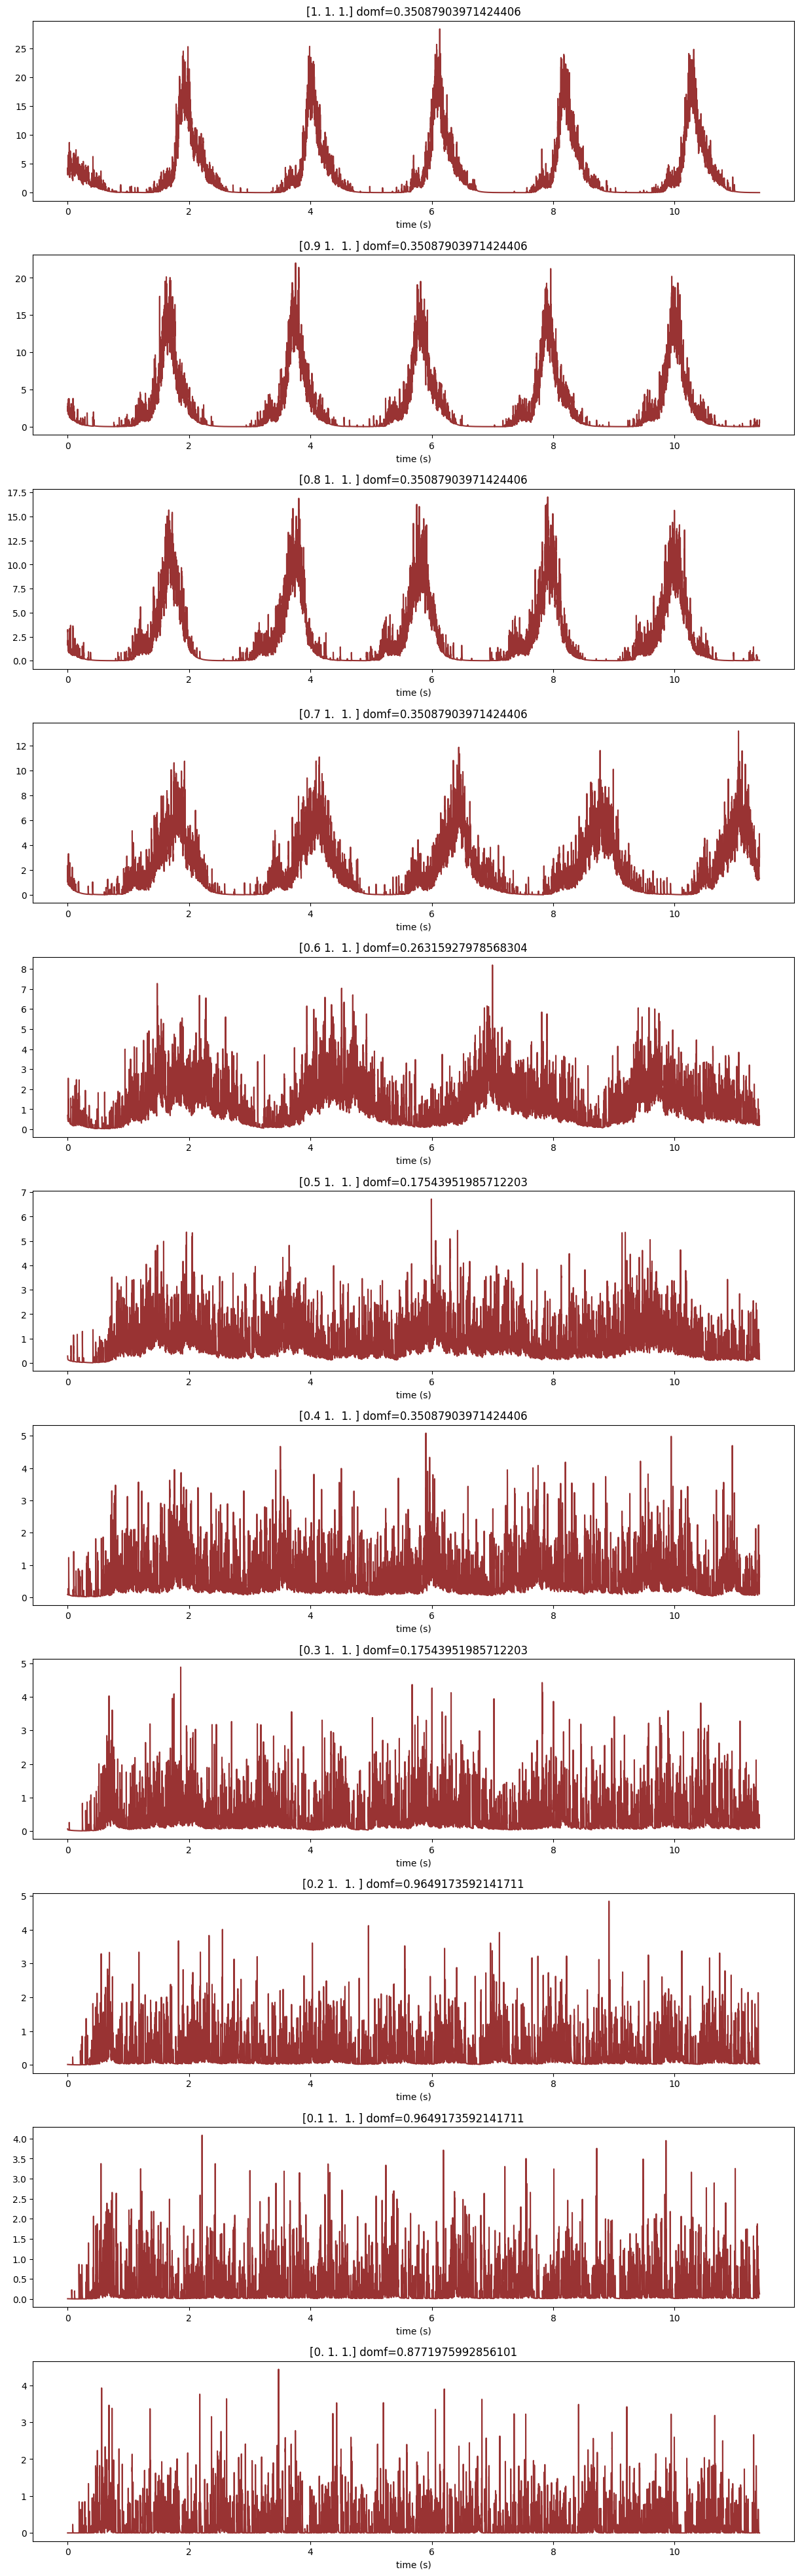

In [8]:
fig, axs = plt.subplots(11)
fig.set_figheight(50)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.3)

#plt.scatter(x=raw[:,0],y=raw[:,1],c=raw[:,2],marker="|",alpha = 0.6)

domfs_n = np.zeros(11)

for i in range(11):
    raw = np.loadtxt(r"..\N_parameter_search\LFP_"+str(i)+".txt")
    #raw = np.loadtxt(r"C:\Users\Jacob\Documents\GitHub\M-Current-modulation-of-cortical-slow-oscillations\coarse_search\LFP_"+str(i)+".txt")

    #take the fourier transform
    freqs = fft.rfftfreq(len(raw[:,1]),0.00006)
    sp = fft.rfft(raw[:,1])
    sp = abs(sp)
    #grab the dominant frequency (only concerned with a certain range, ie. ~0-4 Hz)
    f = freqs[np.argmax(sp.real[1:100])]
    domfs_n[i] = f

    axs[10-i].plot(raw[:,0],raw[:,1],color="maroon",alpha=0.8)
    axs[10-i].set_title(str(str(cs[i,0:3])+ " domf="+str(f)))
    axs[10-i].set_xlabel("time (s)")

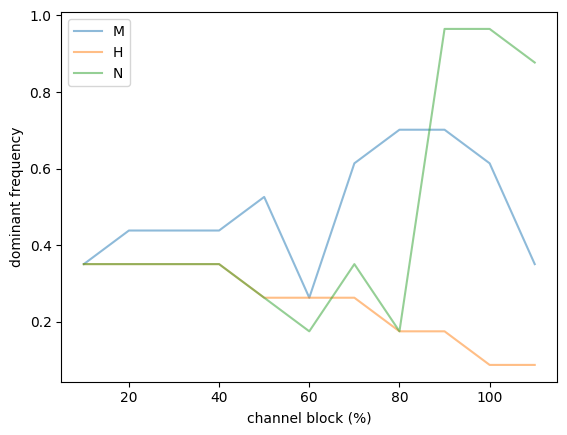

In [9]:
plt.plot(np.arange(110,0,-10),domfs_m, label="M",alpha=0.5)
plt.plot(np.arange(110,0,-10),domfs_h, label="H",alpha=0.5)
plt.plot(np.arange(110,0,-10),domfs_n, label="N",alpha=0.5)
plt.ylabel("dominant frequency")
plt.xlabel("channel block (%)")
plt.legend()